In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv(r'C:\Users\tnradm\Desktop\nasa.csv')
print(type(df['Close Approach Date']));

#model.fit(X,Y);
#print(model.feature_importances_);
data=df.to_numpy();
counter=0;
for i in range(0,40):
    print(type(data[0,i]));
    counter=counter+1;
print(counter);


<class 'pandas.core.series.Series'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'bool'>
40


In [4]:
#converting the dates into the int format by breaking them into day , month and year


df['Close Approach Date']=df['Close Approach Date'].astype(str)
print(type(df['Close Approach Date']));
df['Close Approach Date']=df['Close Approach Date'].astype(str)
date=df['Close Approach Date']
year_c=[0]*len(date)
month_c=[0]*len(date)
day_c=[0]*len(date)

<class 'pandas.core.series.Series'>


In [5]:
def day_month_year(date):
    day=int(date[0:2],10)
    month=int(date[3:5],10)
    year=int(date[6:10],10)
    return day,month,year

for i in range(0,len(date)):
    day_c[i],month_c[i],year_c[i]=day_month_year(date[i])

print(type(year_c[0]))
#print(year_c)

<class 'int'>


In [6]:
df['year of closest approach']=year_c
df['month of closest approach']=month_c
df['day of closest approach']=day_c

In [7]:
#seperating the components of date and time of orbit determination date
df['Orbit Determination Date']=df['Orbit Determination Date'].astype(str)
dates=df['Orbit Determination Date']
year_o=[0]*len(dates)
month_o=[0]*len(dates)
day_o=[0]*len(dates)
hrs_o=[0]*len(dates)
min_o=[0]*len(dates)
sec_o=[0]*len(dates)

In [8]:
def time_orbit(date):
    day=int(date[0:2],10)
    month=int(date[3:5],10)
    year=int(date[6:10],10)
    hrs=int(date[11:13],10)
    min=int(date[14:16],10)
    return day,month,year,hrs,min,0

for i in range(0,len(dates)):
    day_o[i],month_o[i],year_o[i],hrs_o[i],min_o[i],sec_o[i]=time_orbit(dates[i])



In [9]:
df['year of orbit determination']=year_o
df['month of orbit determination']=month_o
df['day of orbit determination']=day_o
df['hour of orbit determination']=hrs_o
df['minute of orbit determination']=min_o
df['second of orbit determination']=sec_o



df['hazardous']=df["Hazardous"].astype(int)



In [10]:
list_drop=['Equinox','Orbit Determination Date','Orbiting Body','Close Approach Date','Hazardous','Neo Reference ID']
df.drop(list_drop,axis=1,inplace=True)
#print(df)


#df['Neo Reference ID']=df['Neo Reference ID'].astype(int)
df['Name']=df['Name'].astype(int)


c:\users\tnradm\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [42] are constant.
  UserWarning)
c:\users\tnradm\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


44
                                0           0
0                            Name  365.538488
1              Absolute Magnitude  555.284236
2              Est Dia in KM(min)   83.623580
3              Est Dia in KM(max)   83.623580
4               Est Dia in M(min)   83.623580
5               Est Dia in M(max)   83.623580
6           Est Dia in Miles(min)   83.623580
7           Est Dia in Miles(max)   83.623580
8            Est Dia in Feet(min)   83.623580
9            Est Dia in Feet(max)   83.623580
10      Epoch Date Close Approach   29.437955
11   Relative Velocity km per sec  179.260399
12    Relative Velocity km per hr  179.260399
13                 Miles per hour  179.260399
14       Miss Dist.(Astronomical)    4.925553
15              Miss Dist.(lunar)    4.925554
16         Miss Dist.(kilometers)    4.925553
17              Miss Dist.(miles)    4.925553
18                       Orbit ID  305.367797
19             Orbit Uncertainity  567.582046
20     Minimum Orbit Intersecti

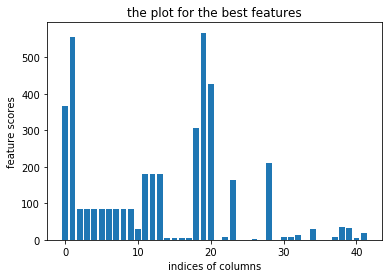

In [11]:
data=df.to_numpy();
col=data.shape[1];

X=df.iloc[:,0:col-1];
Y=df.iloc[:,-1];
bestfeatures = SelectKBest(score_func=f_classif, k="all")
fit = bestfeatures.fit(X,Y)
scores=pd.DataFrame(fit.scores_);
labels=pd.DataFrame(X.columns)
print(col);
scores_grid=pd.concat([labels,scores],axis=1);
print(scores_grid);
scores_grid.columns=['Labels',"Scores"];
X_indices=list(range(col-1));
plt.bar(X_indices,fit.scores_);

plt.xlabel("indices of columns");
plt.ylabel("feature scores");
plt.title("the plot for the best features");
plt.show();

In [12]:
drop_list=['Name',"Est Dia in KM(max)","Est Dia in M(min)","Est Dia in M(max)","Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(max)","Relative Velocity km per sec","Miles per hour","Miss Dist.(lunar)","Miss Dist.(miles)"];

X_new=scores_grid.nlargest(40,'Scores');
print(type(X_new));
new_data=pd.DataFrame(df,columns=X_new['Labels']);
new_data.drop(drop_list,axis=1,inplace=True);
print(new_data.columns);


<class 'pandas.core.frame.DataFrame'>
Index(['Orbit Uncertainity', 'Absolute Magnitude',
       'Minimum Orbit Intersection', 'Orbit ID', 'Perihelion Distance',
       'Relative Velocity km per hr', 'Eccentricity', 'Est Dia in KM(min)',
       'month of orbit determination', 'day of orbit determination',
       'year of closest approach', 'Epoch Date Close Approach',
       'minute of orbit determination', 'Mean Anomaly', 'Epoch Osculation',
       'Aphelion Dist', 'Perihelion Time', 'year of orbit determination',
       'Miss Dist.(kilometers)', 'Miss Dist.(Astronomical)',
       'hour of orbit determination', 'Asc Node Longitude', 'Mean Motion',
       'Orbital Period', 'Semi Major Axis', 'month of closest approach',
       'Inclination', 'Perihelion Arg'],
      dtype='object', name='Labels')


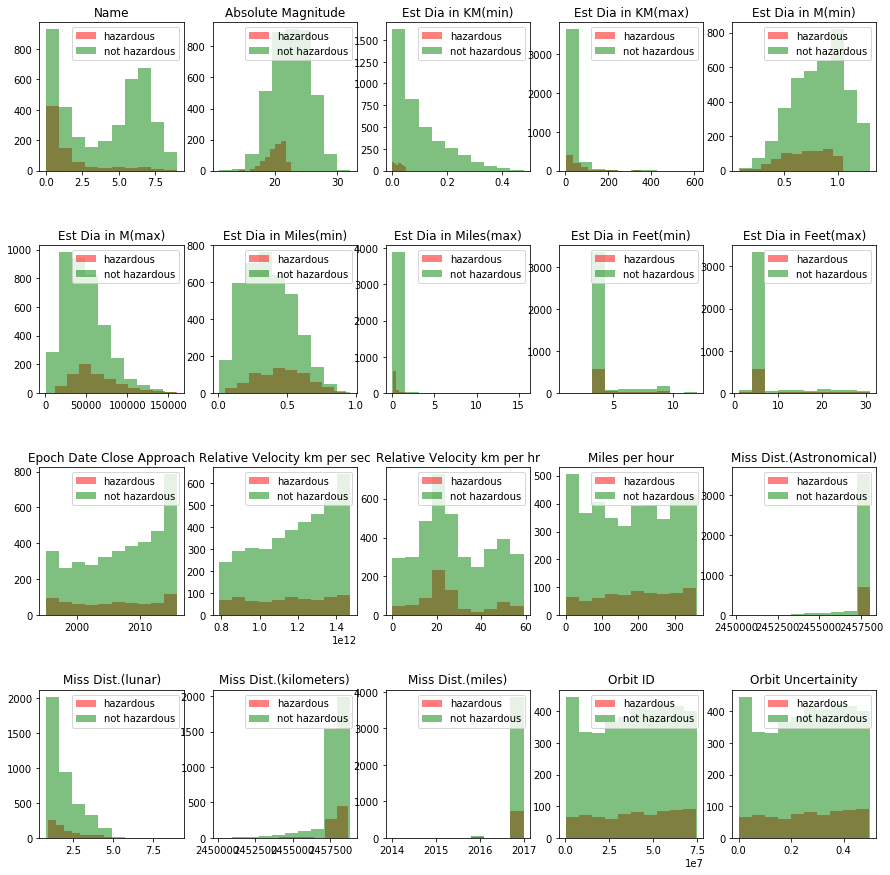

In [13]:
figure, ax = plt.subplots(nrows=4, ncols=5, figsize=(15, 15));
plt.subplots_adjust(hspace=0.5);
counter=0;
bins=10
nh_data = new_data[df.hazardous == 1]
h_data = new_data[df.hazardous == 0]
for x_i in range(0,4):
    for y_i in range(0,5):
        ax[x_i, y_i].hist(nh_data.iloc[:, counter], bins, alpha=0.5, label='hazardous', color='red')
        ax[x_i, y_i].hist(h_data.iloc[:, counter], bins, alpha=0.5, label='not hazardous', color='green')
        ax[x_i, y_i].legend(loc='upper right')
        ax[x_i, y_i].set_title(df.columns[counter])
        counter += 1



plt.show();

Accuracy= 0.8472696245733788
Accuracy= 0.8370307167235495
Accuracy= 0.8506825938566553
Testing the data from index 0 to index 4 [0 0 0 0 0]
0
[0 0 0 ... 0 0 0]


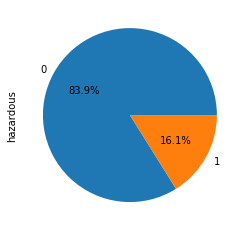

In [14]:
X=np.array(new_data)
X=preprocessing.normalize(X);
#x=preprocessing.scale(x)
Y=np.array(df['hazardous'])
for k in('linear','poly','rbf'):  #calculating the accuracy for all the kernels

    clf=svm.SVC(kernel=k,gamma=0.0002,C=0.1)
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
    clf.fit(x_train,y_train)
    acc=clf.score(x_test,y_test)#CALCULATING ACCURACY
    print('Accuracy=',acc)

print('Testing the data from index 0 to index 4 ',end="")
print(clf.predict(x_test[0:5]))#TEST RUN
print(list(clf.predict(x_test)).count(1));
print(clf.predict(x_test));
df.hazardous.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show();
